<h1><b>Рубежный контроль №2 </b></h1>
Линейная/логистическая регрессия и Градиентный бустинг для world_hapiness_resort.csv

1. Загрузка и предварительный анализ данных

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

Загрузка и анализ данных

In [3]:
data = pd.read_csv('world_happiness_report.csv')
print(f"Размер датасета: {data.shape}")

Размер датасета: (4000, 24)


In [4]:
print("\nПервые 5 строк:")
print(data.head())


Первые 5 строк:
  Country  Year  Happiness_Score  GDP_per_Capita  Social_Support  \
0   China  2022             4.39        44984.68            0.53   
1      UK  2015             5.49        30814.59            0.93   
2  Brazil  2009             4.65        39214.84            0.03   
3  France  2019             5.20        30655.75            0.77   
4   China  2022             7.28        30016.87            0.05   

   Healthy_Life_Expectancy  Freedom  Generosity  Corruption_Perception  \
0                    71.11     0.41       -0.05                   0.83   
1                    63.14     0.89        0.04                   0.84   
2                    62.36     0.01        0.16                   0.59   
3                    78.94     0.98        0.25                   0.63   
4                    50.33     0.62        0.18                   0.92   

   Unemployment_Rate  ...  Public_Trust  Mental_Health_Index  \
0              14.98  ...          0.34                76.44   
1

In [5]:
print("\nИнформация о данных:")
print(data.info())


Информация о данных:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 24 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Country                    4000 non-null   object 
 1   Year                       4000 non-null   int64  
 2   Happiness_Score            4000 non-null   float64
 3   GDP_per_Capita             4000 non-null   float64
 4   Social_Support             4000 non-null   float64
 5   Healthy_Life_Expectancy    4000 non-null   float64
 6   Freedom                    4000 non-null   float64
 7   Generosity                 4000 non-null   float64
 8   Corruption_Perception      4000 non-null   float64
 9   Unemployment_Rate          4000 non-null   float64
 10  Education_Index            4000 non-null   float64
 11  Population                 4000 non-null   int64  
 12  Urbanization_Rate          4000 non-null   float64
 13  Life_Satisfaction         

In [6]:
print("\nОписательная статистика:")
print(data.describe())


Описательная статистика:
              Year  Happiness_Score  GDP_per_Capita  Social_Support  \
count  4000.000000      4000.000000     4000.000000     4000.000000   
mean   2014.670750         5.455005    30482.009953        0.505860   
std       5.724075         1.427370    17216.122032        0.286202   
min    2005.000000         3.000000     1009.310000        0.000000   
25%    2010.000000         4.237500    15425.125000        0.260000   
50%    2015.000000         5.430000    29991.255000        0.510000   
75%    2020.000000         6.662500    45763.085000        0.750000   
max    2024.000000         8.000000    59980.720000        1.000000   

       Healthy_Life_Expectancy      Freedom   Generosity  \
count              4000.000000  4000.000000  4000.000000   
mean                 67.917605     0.502723     0.143960   
std                  10.172091     0.285219     0.200088   
min                  50.000000     0.000000    -0.200000   
25%                  59.177500    

2. Предобработка данных

Проверка пропущенных значений

In [7]:
print("Пропущенные значения:")
print(data.isnull().sum())

Пропущенные значения:
Country                      0
Year                         0
Happiness_Score              0
GDP_per_Capita               0
Social_Support               0
Healthy_Life_Expectancy      0
Freedom                      0
Generosity                   0
Corruption_Perception        0
Unemployment_Rate            0
Education_Index              0
Population                   0
Urbanization_Rate            0
Life_Satisfaction            0
Public_Trust                 0
Mental_Health_Index          0
Income_Inequality            0
Public_Health_Expenditure    0
Climate_Index                0
Work_Life_Balance            0
Internet_Access              0
Crime_Rate                   0
Political_Stability          0
Employment_Rate              0
dtype: int64


In [8]:
numeric_cols = data.select_dtypes(include=[np.number]).columns
data[numeric_cols] = data[numeric_cols].fillna(data[numeric_cols].median())

# Кодирование категориальной переменной Country
data = pd.get_dummies(data, columns=['Country'], drop_first=True)

# Выделение признаков и целевой переменной
X = data.drop('Happiness_Score', axis=1)
y = data['Happiness_Score']

# Масштабирование признаков
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Разделение на обучающую и тестовую выборки
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42)

3. Построение и оценка моделей

Линейная регрессия

In [9]:
# Создание и обучение модели
lr = LinearRegression()
lr.fit(X_train, y_train)

# Прогнозирование
y_pred_lr = lr.predict(X_test)

# Оценка качества
mse_lr = mean_squared_error(y_test, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
mae_lr = mean_absolute_error(y_test, y_pred_lr)
r2_lr = r2_score(y_test, y_pred_lr)

print("\nЛинейная регрессия:")
print(f"RMSE: {rmse_lr:.4f}")
print(f"MAE: {mae_lr:.4f}")
print(f"R²: {r2_lr:.4f}")


Линейная регрессия:
RMSE: 1.4437
MAE: 1.2501
R²: -0.0128


Градиентный бустинг

In [10]:
# Создание и обучение модели
gb = GradientBoostingRegressor(n_estimators=100, random_state=42)
gb.fit(X_train, y_train)

# Прогнозирование
y_pred_gb = gb.predict(X_test)

# Оценка качества
mse_gb = mean_squared_error(y_test, y_pred_gb)
rmse_gb = np.sqrt(mse_gb)
mae_gb = mean_absolute_error(y_test, y_pred_gb)
r2_gb = r2_score(y_test, y_pred_gb)

print("\nГрадиентный бустинг:")
print(f"RMSE: {rmse_gb:.4f}")
print(f"MAE: {mae_gb:.4f}")
print(f"R²: {r2_gb:.4f}")


Градиентный бустинг:
RMSE: 1.4621
MAE: 1.2662
R²: -0.0389


4. Сравнение моделей и выводы


Сравнение моделей:
  Метрика  Линейная регрессия  Градиентный бустинг
0    RMSE            1.443697             1.462146
1     MAE            1.250058             1.266245
2      R²           -0.012831            -0.038883


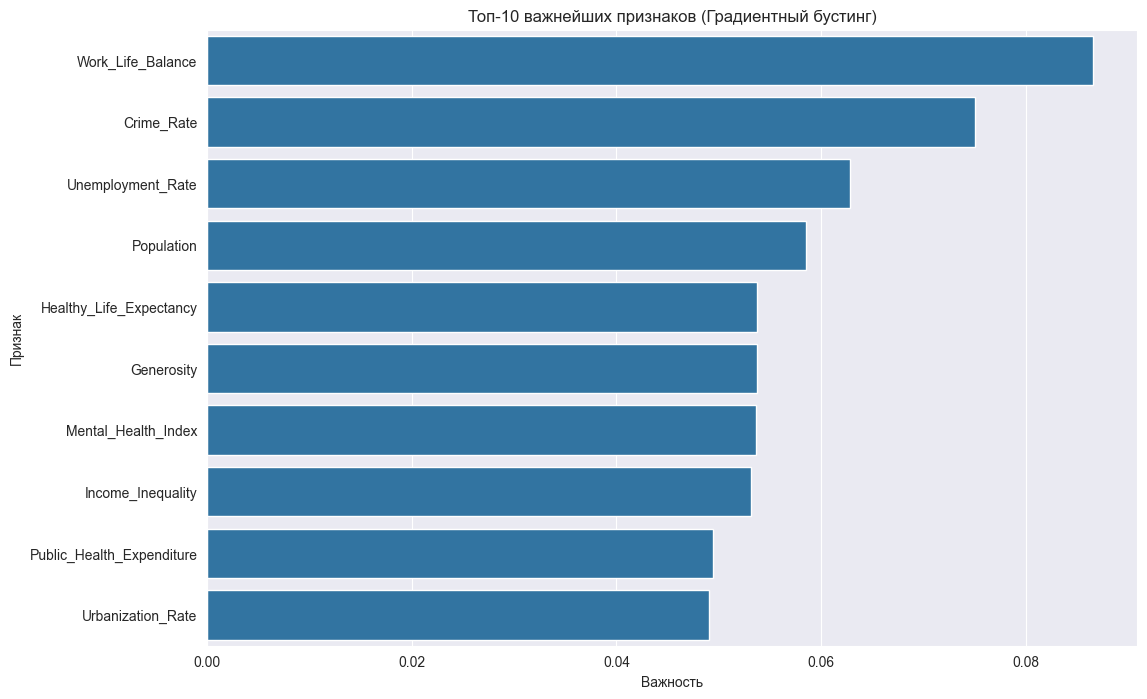

In [11]:
# Создание таблицы результатов
results = pd.DataFrame({
    'Метрика': ['RMSE', 'MAE', 'R²'],
    'Линейная регрессия': [rmse_lr, mae_lr, r2_lr],
    'Градиентный бустинг': [rmse_gb, mae_gb, r2_gb]
})

print("\nСравнение моделей:")
print(results)

# Визуализация важности признаков для градиентного бустинга
feature_importance = pd.DataFrame({
    'Признак': X.columns,
    'Важность': gb.feature_importances_
}).sort_values('Важность', ascending=False)

plt.figure(figsize=(12, 8))
sns.barplot(x='Важность', y='Признак', data=feature_importance.head(10))
plt.title('Топ-10 важнейших признаков (Градиентный бустинг)')
plt.show()